# Exercises, stats 1


This notebook provides practice problems focused on dataframe manipulation, plotting, and running correlations, t-tests and regression.

These exercises will have you load data from three different csv files:

bounce.csv

demo_and_data.csv

nyc_covid.csv

These are on Brightspace under Content / Data /

You will want to download that and put the files somewhere so that you can load them using pd.read_csv() as we've done on previous assignments.

#### Imports

You will need to import the following libraries:

- scipy.stats
- numpy
- seaborn
- pandas
- pingouin

Examples of doing this can be found at the top of the various viz_and_stats notebooks.



In [3]:
import numpy as np
import seaborn as sns
import pandas as pd

# stats functions:
import pingouin as pg
import scipy.stats as stats
import statsmodels.formula.api as smf


 ### Paired t-tests

For this problem we will use a sample dataset stored in the file `demo_and_data.csv`.

The file contains data from a set of participants who participated in a study with two trial types: congruent and incongruent. Each row of the dataframe has data for one participant in either the congruent or incongruent trial_type condition. Each person completed both conditions so we have a within-person design.

In addition to the `trial_type` column, the data includes the average percent correct for those trials (`acc`), the average response time (`RT`), the participant id (`uid`) and some demographic information.

#### Import pandas and load the data into a dataframe

In [8]:
# on my computer the data folder is one level up from where this
# notebook is stored
data_dir = '../data/'

# load the csv file by combining it with it's path and passing to read_csv()
df = pd.read_csv(data_dir + 'demo_and_data.csv')
df

,trial_type,acc,RT,uid,location,age_group
0,congruent,0.46,1.221674,sub-496,urban,child
1,incongruent,0.52,1.891844,sub-496,urban,child
2,congruent,0.42,1.177773,sub-882,urban,child
3,incongruent,0.56,2.195114,sub-882,urban,child
4,congruent,0.42,1.356243,sub-265,urban,adult
...,...,...,...,...,...,...
95,incongruent,0.48,2.082495,sub-900,urban,adult
96,congruent,0.60,1.146174,sub-292,urban,child
97,incongruent,0.52,2.206634,sub-292,urban,child
98,congruent,0.58,1.163608,sub-366,urban,adult


#### Check the possible unique values of the trial_type column

In [9]:
df['trial_type'].unique()

array(['congruent', 'incongruent'], dtype=object)

#### In preparation for running a t-test comparing RT values for each of the two trial_types in the dataframe we need to pull the RT data for each trial_type into their own variable.

Use grouby() and get_group() to pull the data for each trial type into their own dataframes.

If you loaded the data into a dataframe called df, then this code would give you a smaller dataframe for only those places where trial_type was 'congruent':

```python
cong_df = df.groupby('trial_type').get_group('congruent').copy()
```

#### Make two new dataframes, one that has the data for 'congruent' trial type and the other for 'incongruent' trial type:

In [11]:
cong_df = df.groupby('trial_type').get_group('congruent').copy()
incong_df = df.groupby('trial_type').get_group('incongruent').copy()

In [12]:
# alternative approach using boolean indexing
sel = df['trial_type']=='congruent'
cong_df = df[sel]

sel = df['trial_type']=='incongruent'
incong_df = df[sel]


In [13]:
cong_df.head()

,trial_type,acc,RT,uid,location,age_group
0,congruent,0.46,1.221674,sub-496,urban,child
2,congruent,0.42,1.177773,sub-882,urban,child
4,congruent,0.42,1.356243,sub-265,urban,adult
6,congruent,0.46,1.211723,sub-197,rural,adult
8,congruent,0.52,1.079626,sub-501,rural,adult


In [14]:
incong_df.head()

,trial_type,acc,RT,uid,location,age_group
1,incongruent,0.52,1.891844,sub-496,urban,child
3,incongruent,0.56,2.195114,sub-882,urban,child
5,incongruent,0.66,1.977480,sub-265,urban,adult
7,incongruent,0.56,1.972873,sub-197,rural,adult
9,incongruent,0.52,2.102339,sub-501,rural,adult


#### Sort the data

We have RT data for each participant in the two trial types. To compare these RT values between conditions we can do a t-test. 

Our data are paired: we have both measurements for each person, so we will want to run a paired t-test. 

The paired t-test assumes that the numbers that we give it are lined up within pair, so we need to make sure that the two dataframes we created in P1-B are in the same `uid` order.

Use the pandas dataframe sort_values() function. This function will take in a column name to sort by, and you should include an inplace=True argument to preserve the changes being made to the dataframe.


This code will sort the rows in a dataframe called df based on the values in 'column_name' and the sorted dataframe will be the new version (due to inplace=True)

```python
df.sort_values('column_name',inplace=True)
```

In [17]:
cong_df.sort_values('uid', inplace=True)
incong_df.sort_values('uid', inplace=True)
incong_df.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,trial_type,acc,RT,uid,location,age_group
69,incongruent,0.46,2.005256,sub-103,urban,adult
63,incongruent,0.48,2.241769,sub-116,urban,adult
27,incongruent,0.38,1.981894,sub-12,urban,adult
17,incongruent,0.54,2.027019,sub-129,rural,adult
73,incongruent,0.52,2.203529,sub-137,rural,adult


#### Use pinguoin (imported as pg) to run a paired t-test comparing the 'RT' in the congruent to the incongruent trials.

the syntax is like this:

```python
pg.ttest(x=some_data, y=some_other_data, paired=True)
```


The x= and y= arguments are the sets of paired measurements we are comparing. Previously you pulled the congruent and incongruent into different data frames. So you can point x and y to the 'RT' column in those two dataframes.

In [22]:
# your t-test code goes here

t_results = pg.ttest(x=cong_df['RT'], y=incong_df['RT'], paired=True)

t_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-35.414501,49,two-sided,1.428093e-36,"[-0.92, -0.82]",6.803012,1.329e+33,1.0


In [26]:
tval = t_results['T'][0]
dof =  t_results['dof'][0]
p = t_results['p-val'][0]

# round t and p to three decimal places
tval = np.round(tval, 3)
p = np.round(p, 3)

alpha = .05
if p < alpha:
    print(f'The t-test indicated a significant difference: t({dof})={tval}, p < .05')
else:
    print(f'The t-test indicated no significant difference: t({dof})={tval}, p = {p}')

The t-test indicated a significant difference: t(49)=-35.415, p < .05



#### The dataset includes children and we'd like to know if they could perform the task better than random. The `acc` column gives the average percent correct for each person, and .5 means they were not performing better than random chance.
    
Run a one-sample t-test comparing the `acc` for children in the dataset against a comparison value of .5
    
You will need to find a way to get just the parts of the dataframe where age_group is 'child'. In your answer you should report whether the childrens accuracy was significantly different from .5


Pingouin one-sample t-test:

```python
pg.ttest(x=some_numbers, y=population_mean)
```

x is an array of numbers and the one-sample t-test assess whether they were likely to be random samples from a distribution with a mean value as specified in the y= input

In [33]:
# pull data for just the kids
sel = df['age_group']=='child'

child_acc = df[sel]['acc']
print(child_acc)
len(child_acc)

0     0.46
1     0.52
2     0.42
3     0.56
12    0.46
13    0.62
14    0.50
15    0.48
18    0.52
19    0.52
20    0.46
21    0.54
22    0.44
23    0.46
28    0.50
29    0.50
30    0.54
31    0.48
36    0.42
37    0.56
42    0.48
43    0.48
46    0.42
47    0.62
48    0.46
49    0.46
56    0.46
57    0.44
66    0.64
67    0.56
74    0.54
75    0.42
76    0.52
77    0.66
80    0.48
81    0.48
84    0.48
85    0.42
96    0.60
97    0.52
Name: acc, dtype: float64


40

In [34]:
# run a one-sample t-test comparing the kids accuracy scores (0 to 1) against random
# chance or guess rate of .5

pop_mean = .5

one_sample_results = pg.ttest(x=child_acc, y=pop_mean)

one_sample_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.25117,39,two-sided,0.803001,"[0.48, 0.52]",0.039713,0.176,0.056907


## Covid dataset

The _nyc_covid.csv_ file has data for the following variables:


- zip: the zip code where the data were collected
- borough: the borough where the zip code is located	
- neighborhood: the neighborhood where the zip code is located		
- deathper100k: covid deaths per 100k people in this zip code	
- whitepct: percent of population identified as white in this zip code
- medianincome: median income level across people in this zip code	
- asthmapct: percent of people in this zip code with athsma
- popdens: population density in this zip code	
- medianage: median age in this zip code	
- housesize: average number of people per household in this zipcode

#### Load the covid data into a dataframe and get the descriptive statistics for each borough in the dataset. 

Hint: use groupby() with 'borough'

In [38]:
# load the data, get descriptive stats for each borough
data_dir = '../data/'
fname = 'nyc_covid.csv'

cov_df = pd.read_csv(data_dir+fname)
cov_df.head()

,zip,borough,neighborhood,deathper100k,whitepct,medianincome,asthmapct,popdens,medianage,housesize
0,10001,Manhattan,Chelsea/NoMad/West Chelsea,94.16,62.91,88526,9.6,37291.65,37,1.76
1,10002,Manhattan,Chinatown/Lower East Side,252.25,32.23,35859,9.2,85336.07,44,2.18
2,10003,Manhattan,East Village/Gramercy/Greenwich Village,68.55,75.91,112131,10.1,94859.59,32,1.70
3,10004,Manhattan,Financial District,67.29,62.81,157645,9.2,5554.12,37,1.82
4,10005,Manhattan,Financial District,0.00,73.42,173333,9.4,121496.87,30,2.02


In [39]:
# get descriptive stats after grouping by borough
cov_df.groupby('borough').describe()

zip                                                        \
              count          mean         std      min       25%      50%   
borough                                                                     
Bronx          25.0  10463.000000    7.359801  10451.0  10457.00  10463.0   
Brooklyn       37.0  11220.297297   11.259230  11201.0  11211.00  11220.0   
Manhattan      44.0  10039.090909   58.083668  10001.0  10012.75  10025.5   
Queens         59.0  11378.135593  144.541422  11004.0  11361.50  11378.0   
Staten Island  12.0  10306.750000    4.025487  10301.0  10303.75  10306.5   

                                 deathper100k              ... medianage  \
                    75%      max        count        mean  ...       75%   
borough                                                    ...             
Bronx          10469.00  10475.0         25.0  303.849200  ...     40.00   
Brooklyn       11230.00  11239.0         37.0  256.783784  ...     38.00   
Manhattan      10036.25  10282.0         44.0  154.007955  ...     40.00   
Queens         11422.50  11697.0         59.0  274.831017  ...     43.00   
Staten Island  10309.25  10314.0         12.0  239.822500  ...     41.25   

                    housesize                                           \
                max     count      mean       std   min     25%    50%   
borough                                                                  
Bronx          45.0      25.0  2.761200  0.281000  2.18  2.5900  2.850   
Brooklyn       47.0      37.0  2.673243  0.375293  1.95  2.4100  2.680   
Manhattan      48.0      44.0  2.081818  0.359989  1.57  1.8275  2.005   
Queens         49.0      59.0  2.934915  0.481808  2.02  2.6000  2.940   
Staten Island  44.0      12.0  2.832500  0.156967  2.52  2.8075  2.840   

                             
                  75%   max  
borough                      
Bronx          2.9300  3.18  
Brooklyn       2.9200  3.64  
Manhattan      2.2775  2.99  
Queens         3.2850  3.97  
Staten Island  2.8875  3.16  

[5 rows x 64 columns]

In [42]:
# do descriptive stats for just one column
# get descriptive stats after grouping by borough
cov_df.groupby('borough')['housesize'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,25.0,2.761200,0.281000,2.18,2.5900,2.850,2.9300,3.18
Brooklyn,37.0,2.673243,0.375293,1.95,2.4100,2.680,2.9200,3.64
Manhattan,44.0,2.081818,0.359989,1.57,1.8275,2.005,2.2775,2.99
Queens,59.0,2.934915,0.481808,2.02,2.6000,2.940,3.2850,3.97
Staten Island,12.0,2.832500,0.156967,2.52,2.8075,2.840,2.8875,3.16


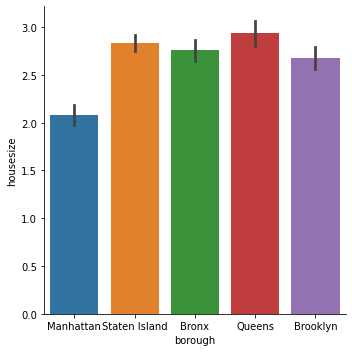

In [45]:
# make a bar plot to vizualize housesize (how many people per household) in each borough
import seaborn as sns

sns.catplot(x='borough', 
            y='housesize', 
            data=cov_df, 
            kind='bar')

#### use the unique() method to find out which possible values appear in the 'borough' column

In [37]:
cov_df['borough'].unique()

array(['Manhattan', 'Staten Island', 'Bronx', 'Queens', 'Brooklyn'],
      dtype=object)

#### Use the dataframe groupby() method to group the dataframe by `borough`, and then use the `get_groups()` method to pull the data for one of the boroughs that you choose.
    
You can use it like this:

    
    
```
group_object = df.groupby('col_name_to_group_by')
one_group_df = group_object.get_group('name of desired group')
```
    
or in one line:
```
one_group_df = df.groupby('col_name_to_group_by').get_group('name of desired group')
```  

In [52]:
# get data for one borough using get_group()
manhattan_df = cov_df.groupby('borough').get_group('Manhattan')

manhattan_df.head()

,zip,borough,neighborhood,deathper100k,whitepct,medianincome,asthmapct,popdens,medianage,housesize
0,10001,Manhattan,Chelsea/NoMad/West Chelsea,94.16,62.91,88526,9.6,37291.65,37,1.76
1,10002,Manhattan,Chinatown/Lower East Side,252.25,32.23,35859,9.2,85336.07,44,2.18
2,10003,Manhattan,East Village/Gramercy/Greenwich Village,68.55,75.91,112131,10.1,94859.59,32,1.70
3,10004,Manhattan,Financial District,67.29,62.81,157645,9.2,5554.12,37,1.82
4,10005,Manhattan,Financial District,0.00,73.42,173333,9.4,121496.87,30,2.02


Using the dataframe for one borough that you just created, make a scatterplot showing the relationship between medianincome and deathper100k columns. 

Your plot should include a title that tells us which Borough you selected for your analysis group.

You can add a title to your plot by putting this after the seaborn plot command:

```python
plt.title('your title')
```

Text(0.5, 1.0, 'Scatterplot of median income and deathper100 in manhattan')

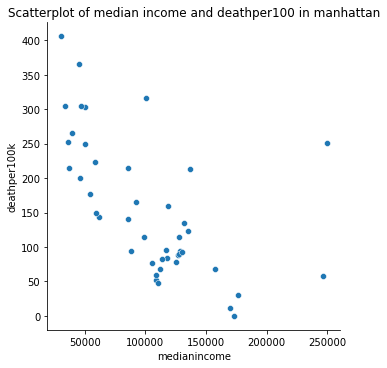

In [51]:
# scatterplot medianincome vs deathper100k
import matplotlib.pyplot as plt
sns.relplot(x='medianincome', y='deathper100k', data=manhattan_df)
plt.title('Scatterplot of median income and deathper100 in manhattan')

#### Compute the correlation between medianincome and deathper100k within your selected borough. What is the r value, what is the p value?

In class we used scipy.stats to compute pearsonr().

Pingouin also has a nice correlation function that can be used like this:

```python
import pingouin as pg
corr_results = pg.corr(x=df['col1'], y = df['col2'])
```

That would compute the correlation between col1 and col2 in a dataframe called df. The results object is dataframe with the r value, p value, and other information.

In [53]:
# compute the correlation
cr = pg.corr(x=manhattan_df['medianincome'], y=manhattan_df['deathper100k'])
cr

,n,r,CI95%,p-val,BF10,power
pearson,44,-0.608399,"[-0.77, -0.38]",0.000012,2019.986,0.99541


In [56]:
r = cr['r'][0]
r = np.round(r,3)
p = cr['p-val'][0]
p = np.round(p,3)


# do some automatic stats reporting
if r < 0:
    corr_direction = 'negative'
elif r > 0:
    corr_direction = 'positive'
else:
    corr_direction = 'none'
    
alpha = .05

var1 = 'medianincome'
var2 = 'deathper100k'
borough = 'Manhattan'

if p < alpha:
    print(f'The correlation between {var1} and {var2} in {borough} was {corr_direction}: ')
    print(f'r = {r}, p < .05')
    
else:
    print(f'The correlation between {var1} and {var2} in {borough} was not significant')
    
    



The correlation between medianincome and deathper100k in Manhattan was negative: 
r = -0.608, p < .05


#### Compute t-test

For this problem you'll use the overall covid dataframe you loaded at the beginning of this section (the one with all the boroughs in it). 
    
We'd like to determine if the rate of covid deaths (`deathper100k`) differed between Manhattan and Brooklyn. 

Conduct a t-test to answer this question. You will need to get the death rate data for these two boroughs into their own columns. There are several ways to do this (including one that you've seen in this notebook).
    
Report whether there is a difference in deathper100k rates in these two boroughs.

In addition to the scipy t-test functions we learned about in class, Pingouin provides some t-test functions that provide more information in the results.

To run an independent sample t-test with Pingouin you do this:

```python
t_results = pg.ttest(x=df['some_column'], y = df2['some_column'], correction=True)
```

Where x= and y= point to arrays of numbers to compare and the correction= argument is for Welch's test if the variances are unequal. From the pg.ttest() documentation:

_"**correction:** string or boolean<br>
For unpaired two sample T-tests, specify whether or not to correct for unequal variances using Welch separate variances T-test. If ‘auto’, it will automatically uses Welch T-test when the sample sizes are unequal, as recommended by Zimmerman 2004."_



In [61]:
# run the t-test

# get the rows where borough is manhattan
sel = cov_df['borough']=='Manhattan'

# subselect the overall dataframe using the selector and then pull the 'deathper100k' column
manhattan_df = cov_df[sel]

# same for brooklyn
# get the rows where borough is manhattan
sel = cov_df['borough']=='Brooklyn'

# subselect the overall dataframe using the selector and then pull the 'deathper100k' column
brooklyn_df = cov_df[sel]


In [62]:
t_results = pg.ttest(x=manhattan_df['deathper100k'], 
                     y = brooklyn_df['deathper100k'], 
                     correction=True)

t_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.942931,66.726445,two-sided,0.000196,"[-154.81, -50.74]",0.899729,137.474,0.978524


#### make a bar plot that shows the mean deathper100k rate within each borrow using sns.catplot() or another tool of your choice.

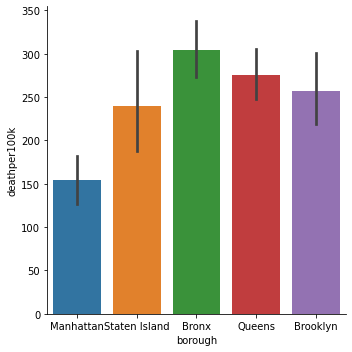

In [63]:
sns.catplot(x='borough', y='deathper100k', data=cov_df, kind='bar')

### Regression on the Covid data

We'd like to see if we can predict how death rates vary across our measured zipcodes by using the other information we have for those zipcodes.
    
Conduct a multiple regression trying to predict deathper100k based on three other variables in the dataset. The other variables should be numeric and you can take your pick of which you think would be relevant for the prediction.
    
In your answer, indicate whether the estimated coefficient for each predictor variable is significantly different from zero.
    
You can use the ols() function implemented in statsmodels.formula.api
    
In the class examples we import statsmodels.formula.api as smf and then use smf.ols() to set up and fit the regression model.

More examples of multiple regression are in the viz_and_stats_regression_inclass_April5th.ipynb and viz_and_stats_regression_inclass_April12th.ipynb notebooks.

In [64]:
cov_df.head()

,zip,borough,neighborhood,deathper100k,whitepct,medianincome,asthmapct,popdens,medianage,housesize
0,10001,Manhattan,Chelsea/NoMad/West Chelsea,94.16,62.91,88526,9.6,37291.65,37,1.76
1,10002,Manhattan,Chinatown/Lower East Side,252.25,32.23,35859,9.2,85336.07,44,2.18
2,10003,Manhattan,East Village/Gramercy/Greenwich Village,68.55,75.91,112131,10.1,94859.59,32,1.70
3,10004,Manhattan,Financial District,67.29,62.81,157645,9.2,5554.12,37,1.82
4,10005,Manhattan,Financial District,0.00,73.42,173333,9.4,121496.87,30,2.02


In [65]:
# In this example I'm runing a regression trying to predict deathper100 based on:
# housesize
# medianage
# popdens (population density)

# first, define the regression formula and pass it to the ordinary least squares function

reg_formula = 'deathper100k ~ housesize + medianage + popdens'

reg_model = smf.ols(formula = reg_formula, data=cov_df)

# use the fit() method to get the regression coefficients
reg_results = reg_model.fit()

# look at the results
reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deathper100k   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     12.51
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.91e-07
Time:                        14:08:43   Log-Likelihood:                -1084.1
No. Observations:                 177   AIC:                             2176.
Df Residuals:                     173   BIC:                             2189.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -208.3545    113.453     -1.836      0.068    -432.285      15.576
housesize     89.5789     19.203      4.665      0.000      51.677     127.481
medianage      5.8436      2.016      2.899      0.004       1.865       9.822
popdens       -0.0001      0.000     -0.371      0.711      -0.001       0.001
==============================================================================
Omnibus:                       55.689   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.483
Skew:                           1.366   Prob(JB):                     6.27e-30
Kurtosis:                       6.281   Cond. No.                     7.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression results

The regression summary table tells us that our regression model could account for about 18% of the variance in deathrates across zip codes ($R^2$) and that this is significantly more than would be accounted for ab a null model ($Prob (F-statistic)$ is less than .05).

For the individual coefficients, housesize and medianage were positively associated with deathper100k as indicated by their positive **coef** values in the middle table. In addition these values were statistically greater than zero based on the t and $P>|t|$ in each row of the table. The popdens variable seemed to not contribute to the prediction based on its small coef and the p value on that value being > .05

## Bounce data

In this question you will be analyzing a dataset that looks at the "bounce times"
of users of a website with cooking recipes. The bounce time is a measure of how quickly someone leaves a website, e.g. the number of seconds after which a user first accesses a webpage from the website and then leaves.

Load the dataset in bounce.csv . The datatset has one row for each participant in the study. You should load the data into a dataframe called `bounce_data` and report the total number of people we have data for.

In [67]:
data_dir = '../data/'
data_file = 'bounce.csv'

bounce_df = pd.read_csv(data_dir + data_file)
bounce_df.head()

,bounce_time,age,county,location
0,165.548520,16,devon,a
1,167.559314,34,devon,a
2,165.882952,6,devon,a
3,167.685525,19,devon,a
4,169.959681,34,devon,a


#### Plot a histogram of the distribution of bounce times in the dataset. 

Your plot should include a title, and the title should indicate what it is that you are plotting as well as the mean of the bounce time values. 

You should store the mean of the bounce time values in a variable and then concatenate that with the rest of your title. 

In other words, your code should work for any dataset of the same structure; you should not compute the mean and then enter that number directly into the figure title.


**Hint**: dataframes have a .mean() method attached to them that will return the mean of all numeric columns in the data. The .mean() method returns a **Series**, and to get the value for one element in the Series you can ask for it by name: 
```# get the mean for all the columns:
results = df.mean()
# extract the mean for one column or variable:
one_mean = results[<desired variable/column name>]

# or you can do the above but all in one line
one_mean = df.mean()[<desired variable/column name>]


```

**Hint**: you can make a title for a seaborn figure by putting plt.title() after your plotting code. The plt.title() function takes a string as input and puts that string as a figure title. In order to access that library you will need to import matplotlib.pyplot as plt

In [73]:
# get the average bounce time across the whole data
bounce_mean = bounce_df.mean()['bounce_time']
# round it to three decimal places
bounce_mean = np.round(bounce_mean,3)
bounce_mean

/var/folders/6w/0hq8cxf50h7_lj6_wkn2h6vr0000gn/T/ipykernel_27701/2732383229.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bounce_mean = bounce_df.mean()['bounce_time']


201.316

Text(0.5, 1.0, 'Distribution of bounce_times (mean=201.316)')

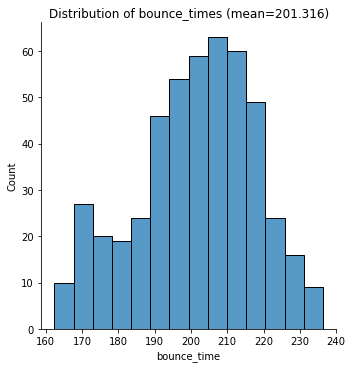

In [74]:
# make histogram with seaborn displot()
sns.displot(x='bounce_time', data=bounce_df)

# add a title and use the calculated mean value
title_string = f'Distribution of bounce_times (mean={bounce_mean})'
plt.title(title_string)

#### Plot a scatterplot of bounce times versus age snd inspect the plot.
We are interested in whether bounce times can be related to the age of the user.  Does it look there is a relationship between age and bounce time? Do older or younger people spend more time on the website?



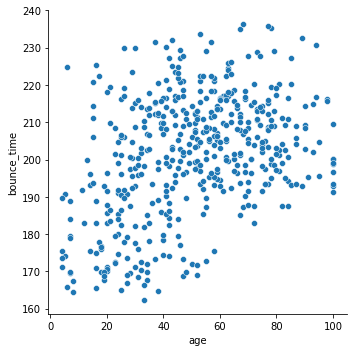

In [76]:
sns.relplot(x='age', y='bounce_time', data=bounce_df)

### Based on the scatter plot it looks like there might be a positive relationship between age and bounce time: as age goes up, bounce time does as well

Quantify the relationship proposed in the last scatterplot question: compute a regression that will tell us whether bounce time can be predicted by age. 
    
After running the regression you should report the estimated coefficient for age and whether that coefficient is significantly different from zero. 

(reminder: after setting up and fitting your model, there is a .summary() method attached to the model fit object and that will give you all the info you need)



In [77]:
# first, define the regression formula and pass it to the ordinary least squares function

reg_formula = 'bounce_time ~ age'

reg_model = smf.ols(formula = reg_formula, data=bounce_df)

# use the fit() method to get the regression coefficients
reg_results = reg_model.fit()

# look at the results
reg_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            bounce_time   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     84.58
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           1.14e-18
Time:                        14:17:52   Log-Likelihood:                -1978.7
No. Observations:                 480   AIC:                             3961.
Df Residuals:                     478   BIC:                             3970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    187.4091      1.659    112.951      0.000     184.149     190.669
age            0.2755      0.030      9.197      0.000       0.217       0.334
==============================================================================
Omnibus:                       12.593   Durbin-Watson:                   0.383
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                6.671
Skew:                           0.019   Prob(JB):                       0.0356
Kurtosis:                       2.424   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression results: there is a positive and significant relationship between age and bounce_time

The coeficient for 'age' is .2755 and the p value on the test of whether this is different from zero is something smaller than .05 ($P>|t|$ colum for age in the middle table of the results summary)

#### Plot the best fit regression line

The standard equation for a line is of the form 

$y = Intercept + w*x$

Where x is each input value. 
    
The regression results from the last question give you all the information you need to produce the best fitting regression line relating age to bounce time: if we ask for the summary() from the fit object we get an intercept from the model, and we have a coefficient that corresponds to the $w$ in our $w*x$ above.

In this problem you will replot your age X bounce scatterplot from before but this time overlaying the best fit line. 

You can do that by first calling your seaborn plot and then calling matplotlib.pyplot to plot the line:

```
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# do your scatterplot:
sns.whatever_kind_of_plot(whatever inputs)

# add a line by specifying a set of x values and y values to pass to plt.plot():
plt.plot(x_vals, y_vals)
```

To complete this problem you will need to generate a set of y_vals by re-writing the equation for a line and including the relevant intercept and w values from your regression model. You can get a bunch of y values all at once by applying your code to an array of x values. 
    
    You can use `x_vals = np.linspace(0,100)` to get an array of x values from zero to 100. Then, if you did something like this, where b1 is the value for the regression coefficient for your predictor and intercept is the Intercept, you would get a bunch of y values based on the coefficient:
    
    b1 = .45
    intercept = 10.1
    x_vals = np.linspace(0,100)
    
    y_pred = (b1*x_vals) + intercept
   

In [82]:
# get the intercept and the coefficient for age
intercept = reg_results.params['Intercept']
b1 = reg_results.params['age']

# get the min and max age 
# these will be used to set the boundaries on our line
amin = bounce_df['age'].min()
amax = bounce_df['age'].max()

# make an array of 100 x values going from min to max
x = np.linspace(amin, amax, 100)


# use the intercept, b1, and the x values to get predicted y values
y_pred = (b1*x) + intercept

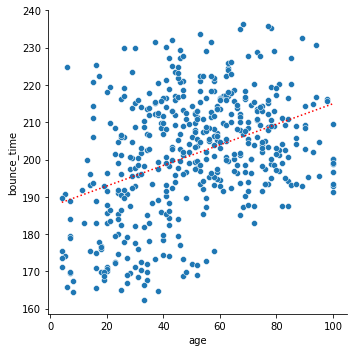

In [84]:
# replot the scatterplot from before
sns.relplot(x='age', y='bounce_time', data=bounce_df)


# add the best fit line
# make it red and dashed
plt.plot(x, y_pred, 'r:')

## Simulating data

In this section we will take advantage of the random selection functions provided by numpy.

```
import numpy.random as npr

# randomly select N numbers from a Gaussian normal distribution with mean mu and standard deviation sd
mu = 0
sd = 1
N = 10
npr.normal(mu, sd, N)

# randomly select N numbers from a uniform distribution between min (inclusive) and max (not included)
min = 0
max = 100
npr.uniform(min, max, N)

# randomly select N INTEGERS from a uniform distribution between min (inclusive) and max (not included)
min = 0
max = 100
npr.randint(min, max, N)


# you can use np.mean() to get the average of a set of samples
all_samples = npr.normal(mu, sd, N)
all_samples_mean = np.mean(all_samples)

# or in one line:
all_samples_mean = np.mean(npr.normal(mu, sd, N))

```



Select 10 samples from a Gaussian normal distribution with mean and sd of your choice. Make a histogram.

Text(0.5, 1.0, '10 samples from a normal distribution with mean=10 and sd=5')

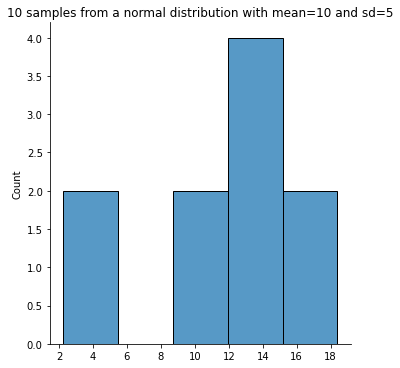

In [87]:
import numpy.random as npr


n_samples = 10
mu = 10
sd = 5

# get samples from a normal distribution
d = npr.normal(mu, sd, n_samples)

# make a histogram
sns.displot(d)

plt.title(f'{n_samples} samples from a normal distribution with mean={mu} and sd={sd}')

Now try taking samples of 25, 50, 100, 500, 1000, and 10000 and plotting the histogram. What happens to the shape as the sample size goes up?

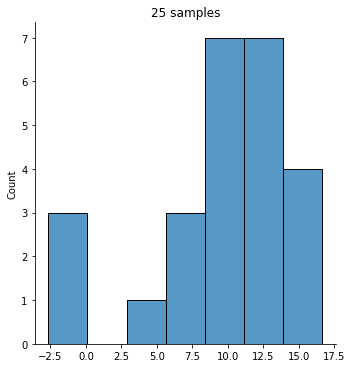

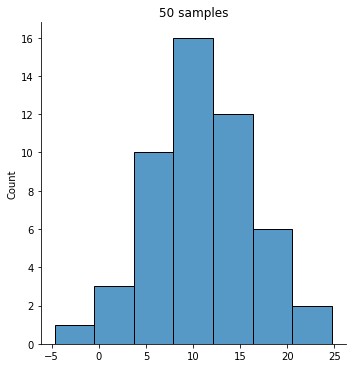

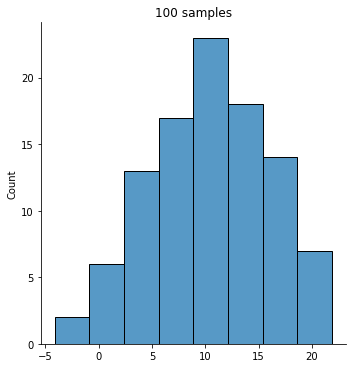

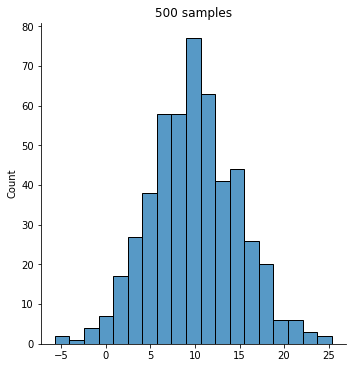

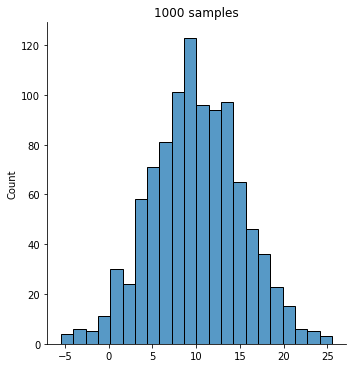

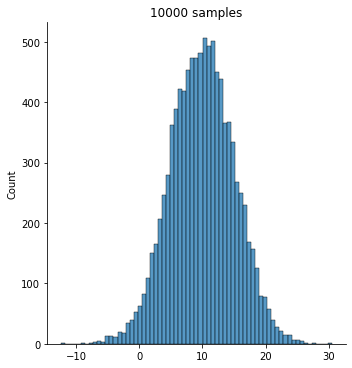

In [88]:
sample_sizes = [25, 50, 100, 500, 1000, 10000]


for n_samples in sample_sizes:
    d = npr.normal(mu, sd, n_samples)
    
    sns.displot(d)
    plt.title(f'{n_samples} samples')


Select 1000 samples from a uniform distribution with min 0 and max 100. Histogram the results.

In [90]:
n_samples = 1000
smallest = 0
largest = 100

d = npr.uniform(smallest, largest, n_samples)

Text(0.5, 1.0, '1000 samples from uniform distribution over 0 to 100')

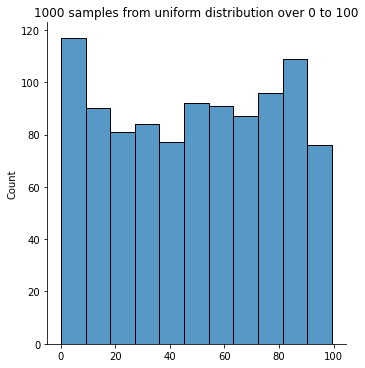

In [91]:
sns.displot(d)

plt.title(f'{n_samples} samples from uniform distribution over {smallest} to {largest}')

#### random samples in a loop

Random number samples can be variable, and although you might be drawing data from a true normal distribution using npr.normal(), by chance you might sometimes get extreme values.
    
Build a loop that will run 1000 times. 

Each time through the loop, do a new sample of 25 values from a normal distribution with mean 0 and SD of 1. Then calculate the mean of those values using np.mean(x) where x is the set of 25 random samples.

Store (append) the mean from each iteration of your loop in a list variable. You will want to make an empty list before the loop and then append the mean values to that.

When you're done, histogram your 1000 mean values. You have now generated the "sampling distribution of the mean" which gives a sense of how often you would expect to observe sample means of various values give your sample size.

In [95]:
mu = 0

sd = 1

n_samples = 25

# an empty list to append to in the loop
sample_means = []

n_loops = 1000

for i in range(0, n_loops):

    # take a random sample
    d = npr.normal(mu, sd, n_samples)
    
    # calculate the mean of the sample and save the value
    sample_means.append(np.mean(d))

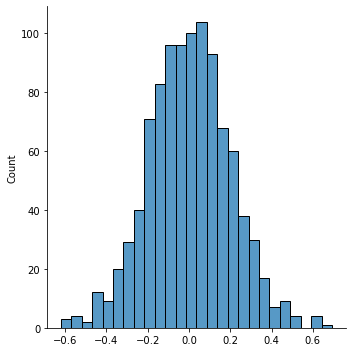

In [97]:
sns.displot(sample_means)

